In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [225]:
# Reading the dataset and storing it in the form of dataframe
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [227]:
# To get information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [229]:
df.shape # (rows, columns)

(100000, 9)

In [231]:
# To get column names
df.columns.tolist()

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'smoking_history',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level',
 'diabetes']

In [233]:
# To check datatype of columns in dataset
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [235]:
# Gives statistical summary of the DataFrame
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [237]:
# Display last n rows of dataset where n is the value given in the parameter which shows no. of rows to display from last. 
# By default: if not value given then it displays first five rows
# df.head(10)
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [239]:
# Display last n rows of dataset where n is the value given in the parameter which shows no. of rows to display from last. 
# By default: if not value given then it displays first five rows
# df.tail(15)
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [241]:
# Displays count of unique values in each column of dataset
df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
smoking_history           6
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [243]:
# to check total number of duplicated rows
print(df.duplicated().sum())

3854


In [245]:
# To drop duplicate rows from the dataset
df.drop_duplicates(inplace=True)

In [247]:
# To check count of null values of each column
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

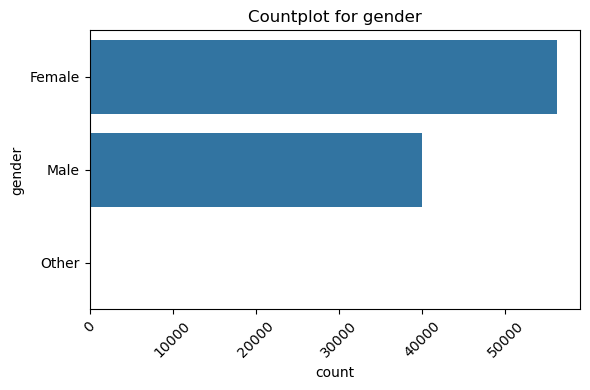

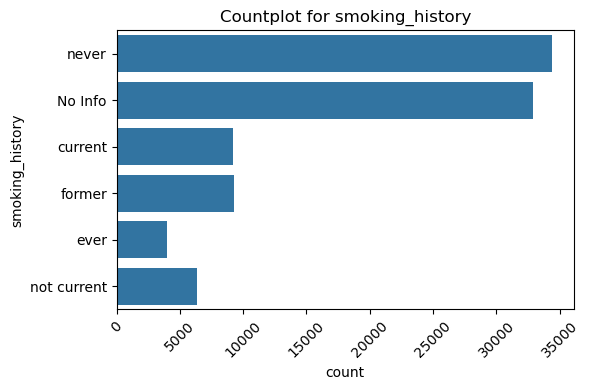

In [249]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(df[col])
    plt.title(f"Countplot for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

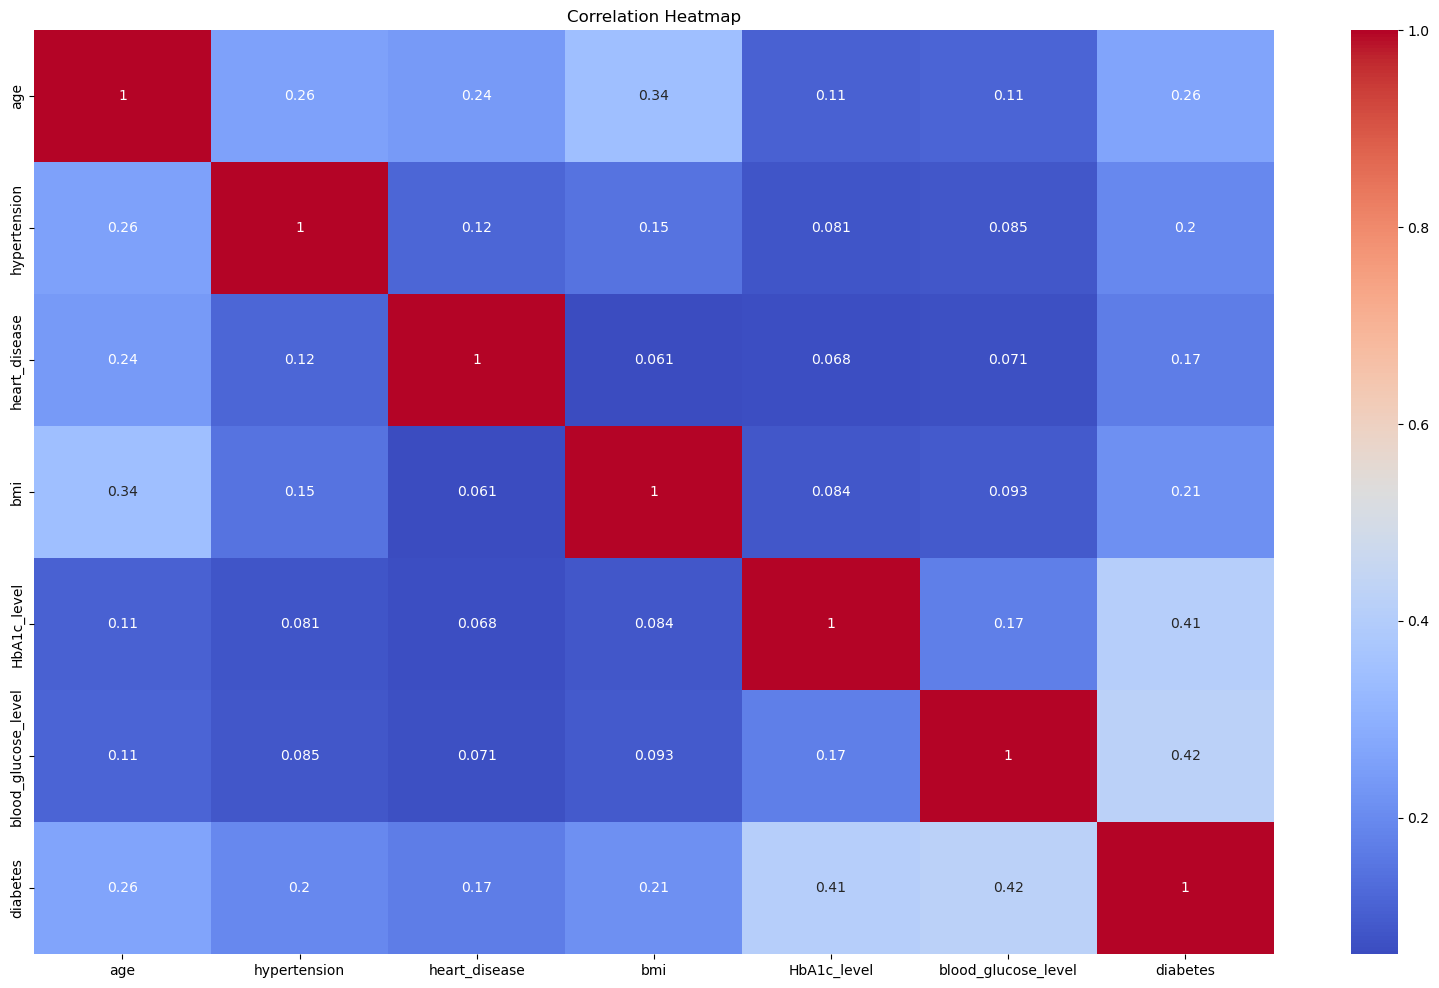

In [251]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

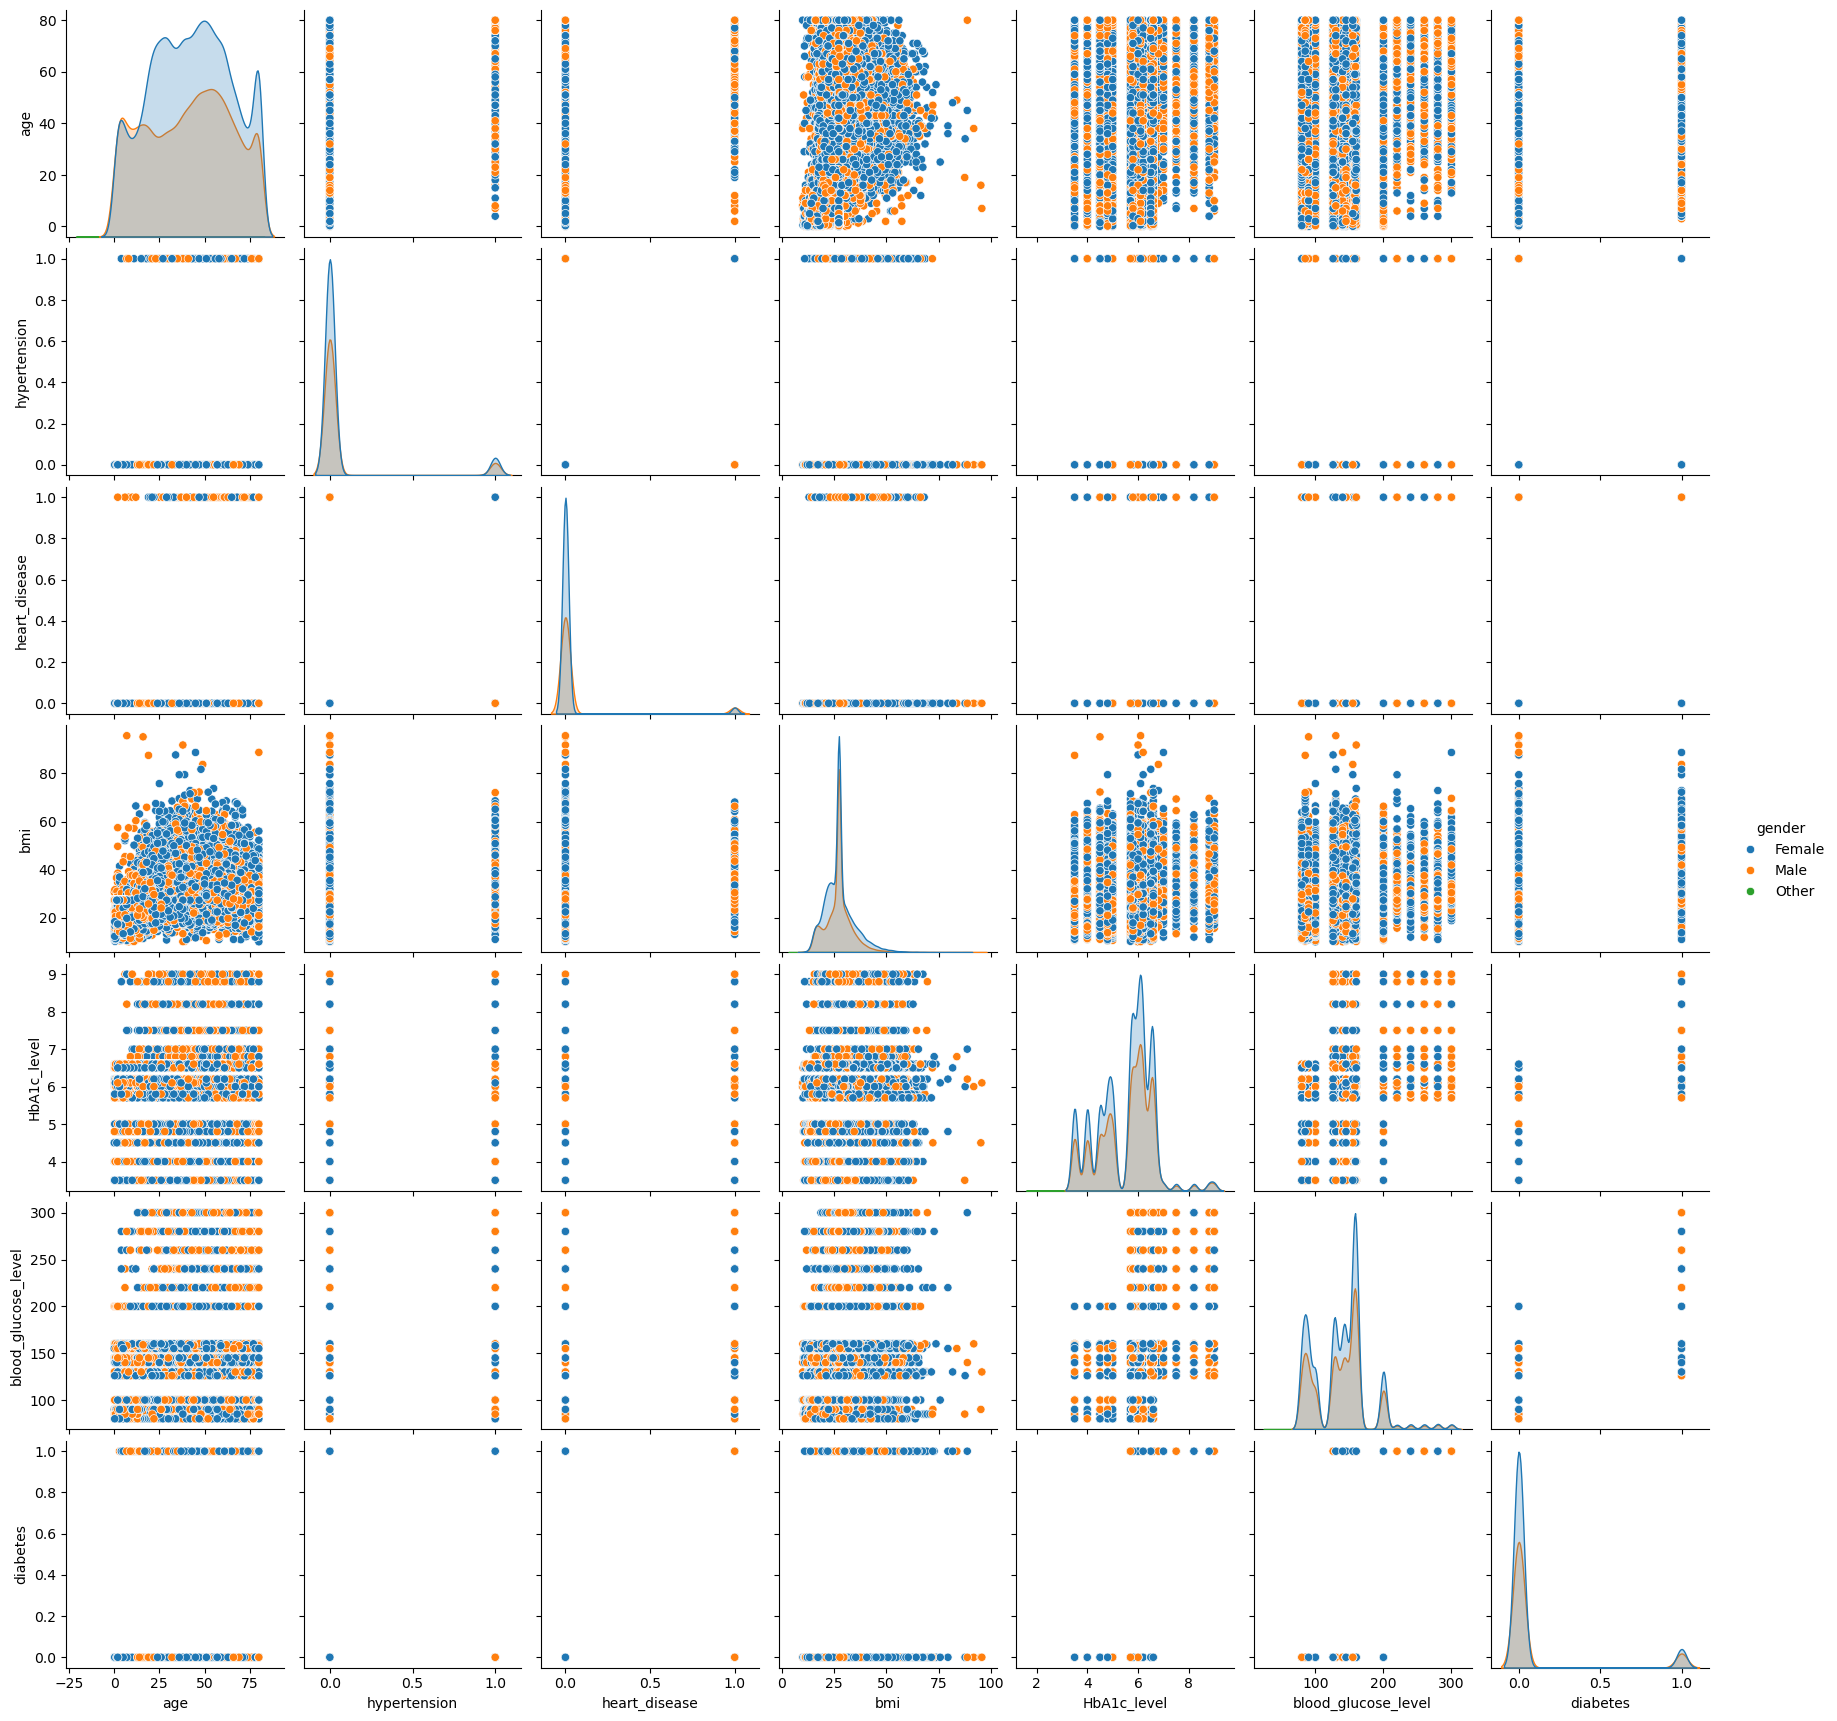

In [253]:
sns.pairplot(df, diag_kind="kde", hue="gender")
plt.show()

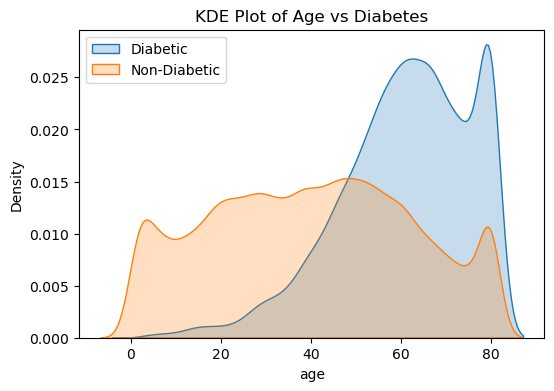

In [254]:
plt.figure(figsize=(6,4))
sns.kdeplot(df[df['diabetes']==1]['age'], label='Diabetic', shade=True)
sns.kdeplot(df[df['diabetes']==0]['age'], label='Non-Diabetic', shade=True)
plt.title("KDE Plot of Age vs Diabetes")
plt.legend()
plt.show()

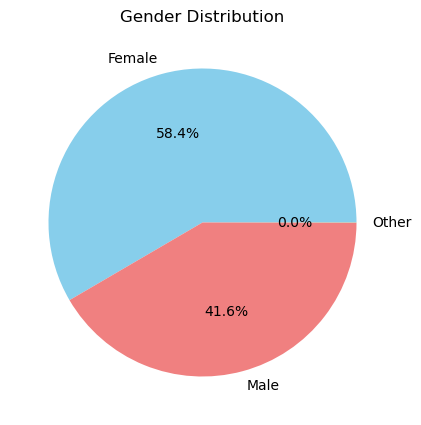

In [255]:
plt.figure(figsize=(5,5))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

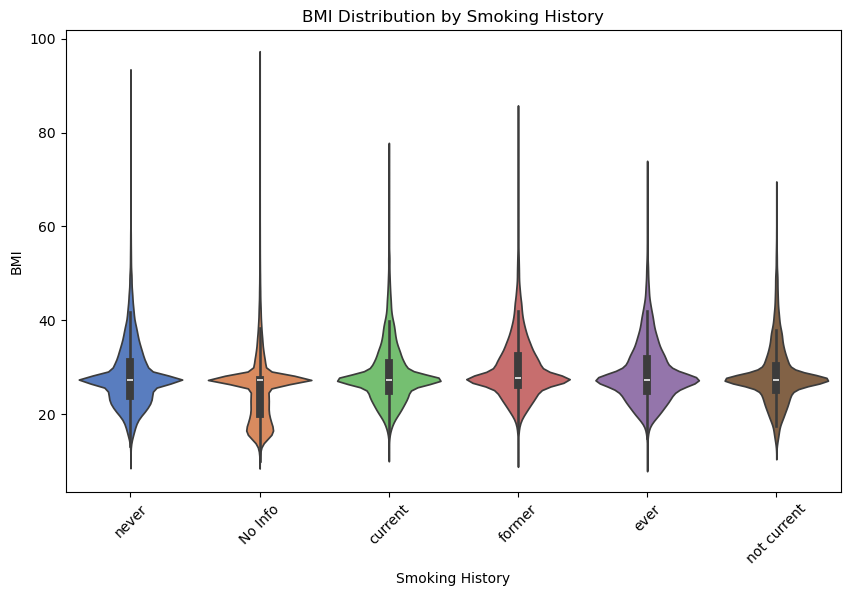

In [256]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoking_history', y='bmi', data=df, palette='muted')
plt.title('BMI Distribution by Smoking History')
plt.xlabel('Smoking History')
plt.ylabel('BMI')
plt.xticks(rotation=45)
plt.show()

In [261]:
# CatBoost Regressor - Main ML Algorithm - Used to handle categorical data

cat_features = ['gender', 'smoking_history']

X_catboost = df.drop('diabetes', axis=1) # since catboost handles categorical data only. That's why, it is specified for it only
y_catboost = df['diabetes'] 

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_catboost, y_catboost, test_size=0.2, random_state=42)

# Train model
cat_model = CatBoostRegressor(verbose=0, learning_rate=0.05, depth=6, iterations=500)
cat_model.fit(X_train, y_train, cat_features=cat_features)

# Predict and evaluate
y_pred = cat_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score (EVS): {evs}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error (MEDAE): {medae}")

Mean Absolute Error (MAE): 0.05083115277460998
Mean Squared Error (MSE): 0.02350624335342076
Root Mean Squared Error (RMSE): 0.1533174593887492
R-squared (R²): 0.7115307114814535
Explained Variance Score (EVS): 0.711530735551409
Median Absolute Error (MEDAE): 0.005434111628657513


In [263]:
# To handle categorical data for additional algorithms, we will do Label Encoding here
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [265]:
# Scaling - We'll do standardization here for additional algorithms

cols_to_scale = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

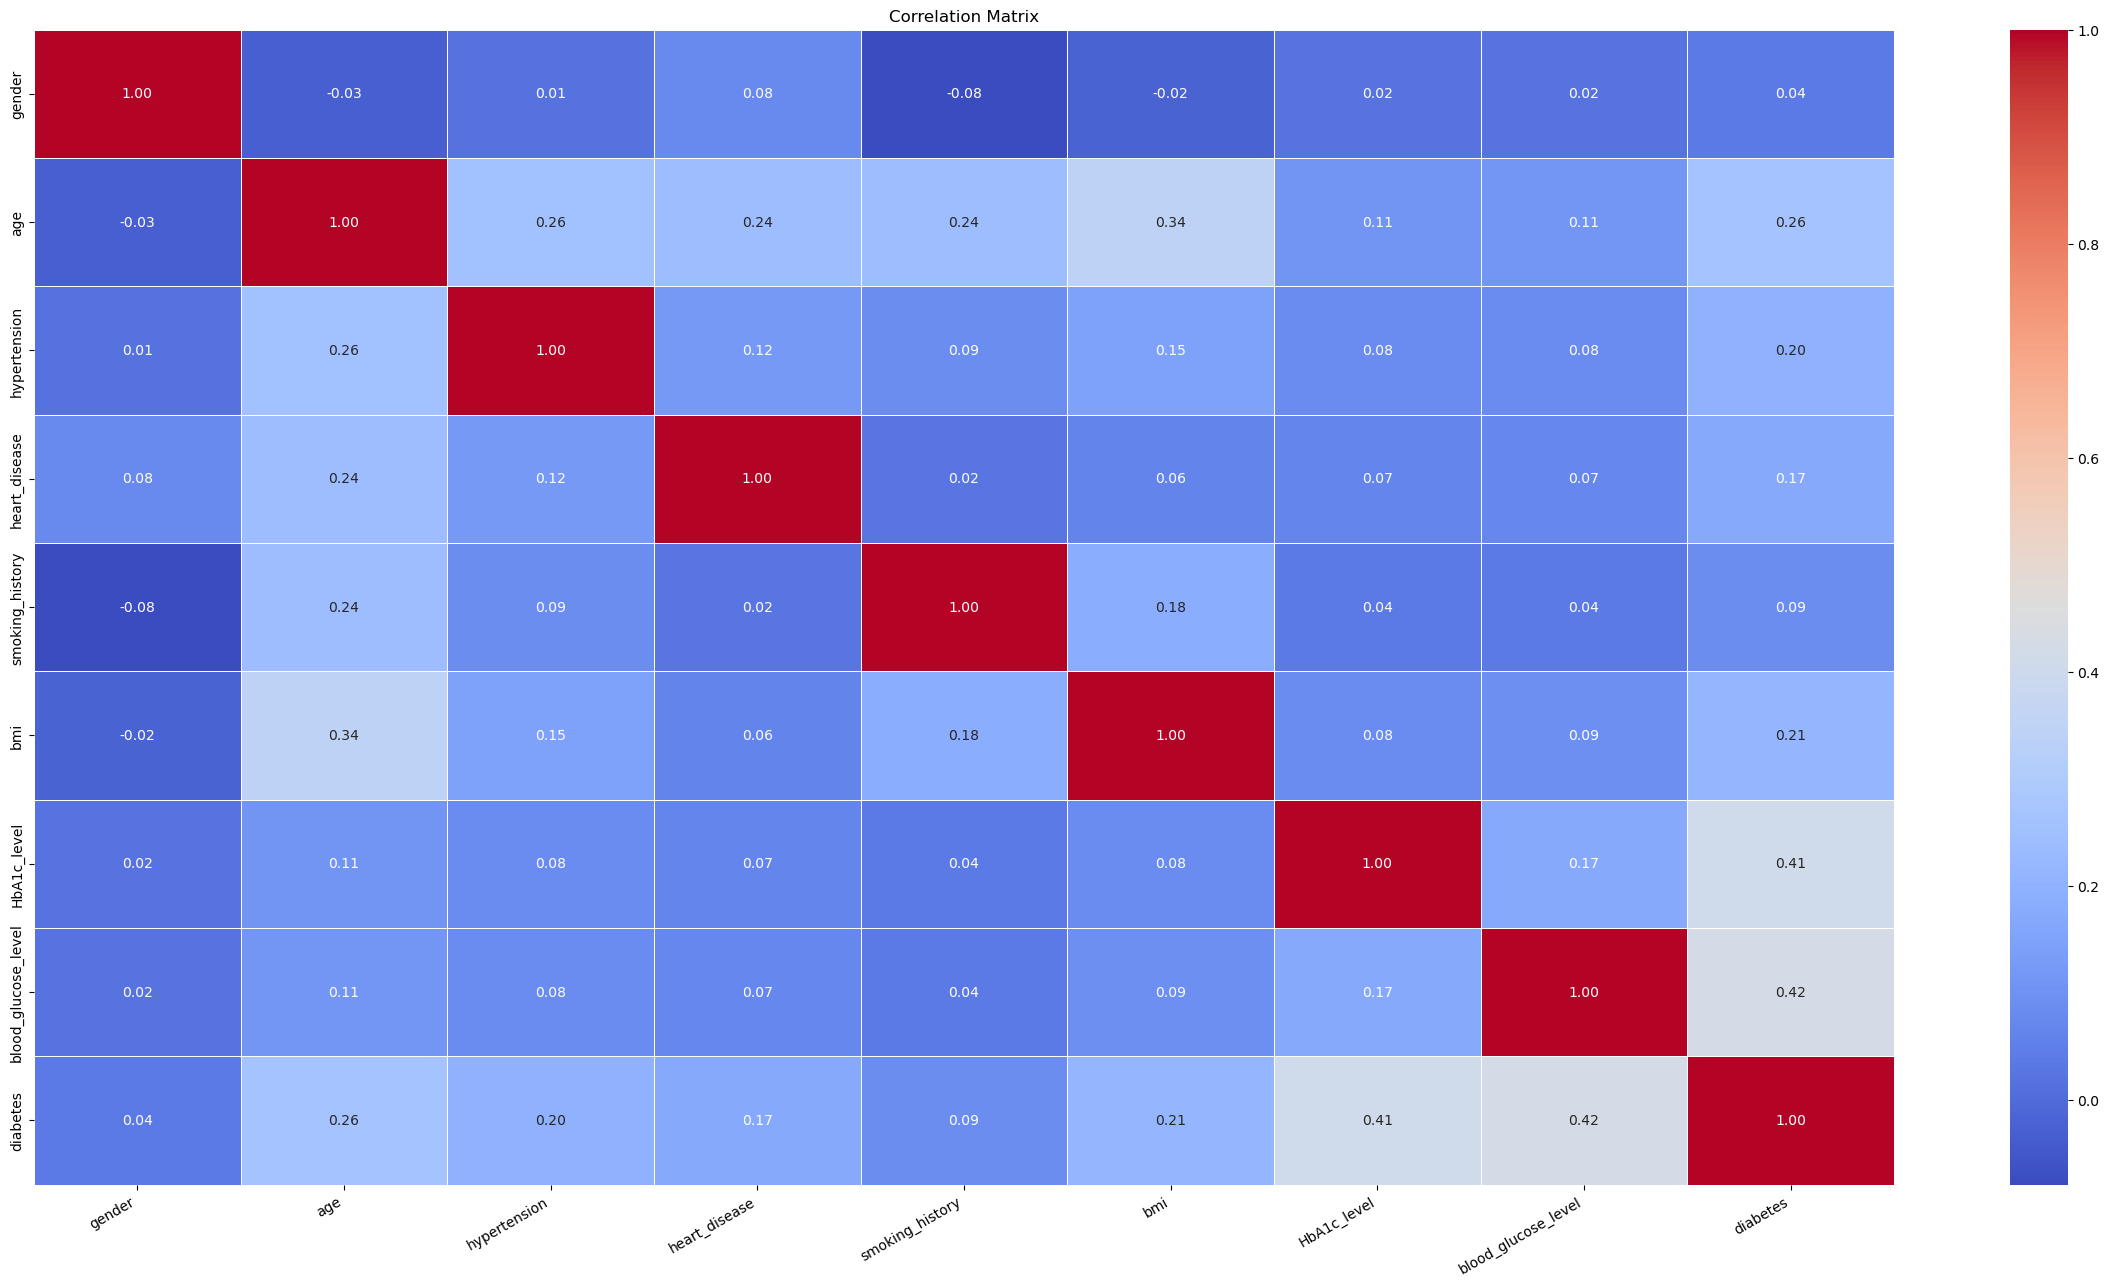

In [267]:
correlation_matrix = df.corr() # Correlation Matrix -> How change in one column affects other
# used matplot and seaborn here
plt.figure(figsize=(30, 15)) # width: 30 , height:15
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

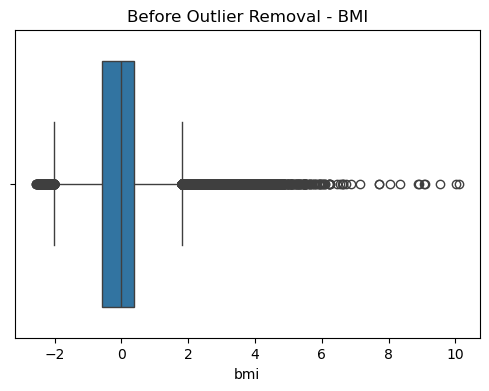

In [269]:
# Removing Outliers
# Before removing outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bmi'])
plt.title('Before Outlier Removal - BMI')
plt.show()

In [271]:
# Process of removing Outlier
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

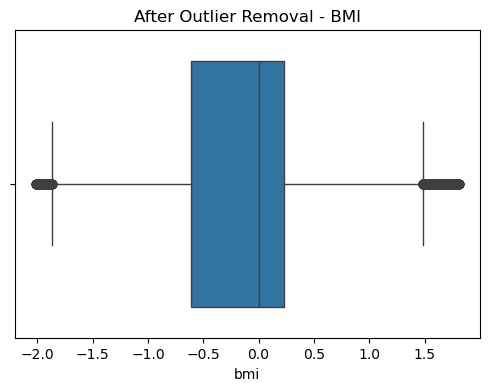

In [273]:
# After Outlier Removal
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['bmi'])
plt.title('After Outlier Removal - BMI')
plt.show()

In [275]:
print(df['diabetes'].value_counts())

diabetes
0    83577
1     7215
Name: count, dtype: int64


In [277]:
# X -> input features
# y -> output variable
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [279]:
# For handling imbalance in data -> We use three techniques

print(f"Original Size: {y.value_counts()}")
balance = SMOTE(random_state=42) # Oversampling technique
# balance = TomekLinks() # Undersampling technique
# balance = SMOTETomek(random_state=42) # Combination technique
X, y = balance.fit_resample(X, y)
print(f"Resampled Size: {y.value_counts()}")

Original Size: diabetes
0    83577
1     7215
Name: count, dtype: int64
Resampled Size: diabetes
0    83577
1    83577
Name: count, dtype: int64


In [281]:
df = pd.concat([X,y], axis=1)

In [283]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [285]:
# RandomForestRegressor - 1st additional algorithm
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train) # Training model
y_pred = rf_model.predict(X_test) # Testing the model

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score (EVS): {evs}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error (MEDAE): {medae}")

Mean Absolute Error (MAE): 0.03672358489625398
Mean Squared Error (MSE): 0.015785327900289567
Root Mean Squared Error (RMSE): 0.12563967486542443
R-squared (R²): 0.9368539694745953
Explained Variance Score (EVS): 0.9368673886327391
Median Absolute Error (MEDAE): 0.0


In [287]:
# XGBoost Regression - 2nd additional algorithm
xgb_model = XGBRegressor(learning_rate=0.1, n_estimators=100)
xgb_model.fit(X_train, y_train) # Training model
y_pred = xgb_model.predict(X_test) # Testing the model

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score (EVS): {evs}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error (MEDAE): {medae}")

Mean Absolute Error (MAE): 0.07202421108443727
Mean Squared Error (MSE): 0.02495086264895749
Root Mean Squared Error (RMSE): 0.15795842063327137
R-squared (R²): 0.9001891016960144
Explained Variance Score (EVS): 0.9001910121268297
Median Absolute Error (MEDAE): 0.013407289981842041


In [289]:
# Linear Regression - 3rd additional algorithm
lr_model = LinearRegression()
lr_model.fit(X_train, y_train) # Training model
y_pred = lr_model.predict(X_test) # Testing the model

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score (EVS): {evs}")
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error (MEDAE): {medae}")

Mean Absolute Error (MAE): 0.2654866192729824
Mean Squared Error (MSE): 0.10254165162205257
Root Mean Squared Error (RMSE): 0.3202212541697577
R-squared (R²): 0.5898027393315812
Explained Variance Score (EVS): 0.5898146416102112
Median Absolute Error (MEDAE): 0.24480708047106536
